In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
# data manipulatin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# drop null rows
# df = df.drop(df[df['Route'].isnull() == True].index)
# df = df.drop(df[df['Total_Stops'].isnull() == True].index) # or we canuse below logic also 
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
#re assign data types to given data types

#print(df["Additional_Info"].value_counts())
#df = df.drop(["Additional_Info"],axis = 1)
#df

In [7]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## EDA

In [8]:
# cahange date and time formate to date-time
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
#df["Dep_Time"] = pd.to_datetime(df["Dep_Time"],format='%H%M')
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [9]:
# we will extract date and time from diffrent columns 
# this logic will use to convert real object data to date and time formate ,but as we already converted so we don't need to use it
df["Journey_Day"] = pd.to_datetime(df.Date_of_Journey,format = "%d%m%Y").dt.day # here dt.day will extract the year from the given data
df["Journey_month"] = df["Date_of_Journey"].dt.month # we don't need to convert as we converted real data into date and time
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [10]:
# we are extracting departure time here 
df["departure_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour # we made new column contain only departure time in hour
df["departure_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute # we made new column contain only departure time in minute
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,departure_hour,departure_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [11]:
# will do same for arrival time as well 
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [12]:
# # we have duration also in time formate to we will convert into that in to minute and hour seperattly
# # or we can keep only one column contain only total duration in minute it will also helpful to predict 
# # df3 = (df["Duration"][3].split(sep = "h")[1]) # these two line will extract hour and time just use in loop add more value 
# # int(df3.split(sep = "m")[0]) # 


duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
hours = []
minute = []
for i in range(len(duration)):
    hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    minute.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration 
    

In [13]:
df["Duration_hour"] = hours
df["Duration_minute"] = minute

In [14]:
# Handling Categorical Data
# we have noinal catagorical data which i not our target variable but , exist in catagorical form
# data which are catagorical we will do onehat coding and for order data we will do labled encoding like ,months name ,
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

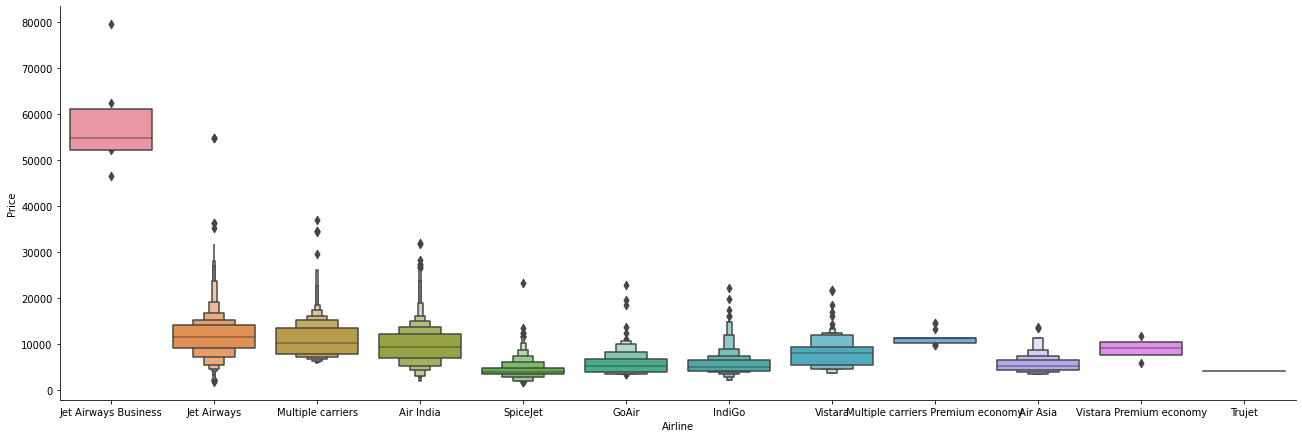

In [15]:
# plt.boxplot(ax)
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [16]:
# here airline data is catgorical so we will do onehat encoding
# jetairways is most repeated value that is why we will left that column for sake of good calculation
Airline  = df[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [17]:
# we will do same thing for rest of part of remaining columns as well
# this is also catagorical data  so we will do same thing as one hat encoding
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

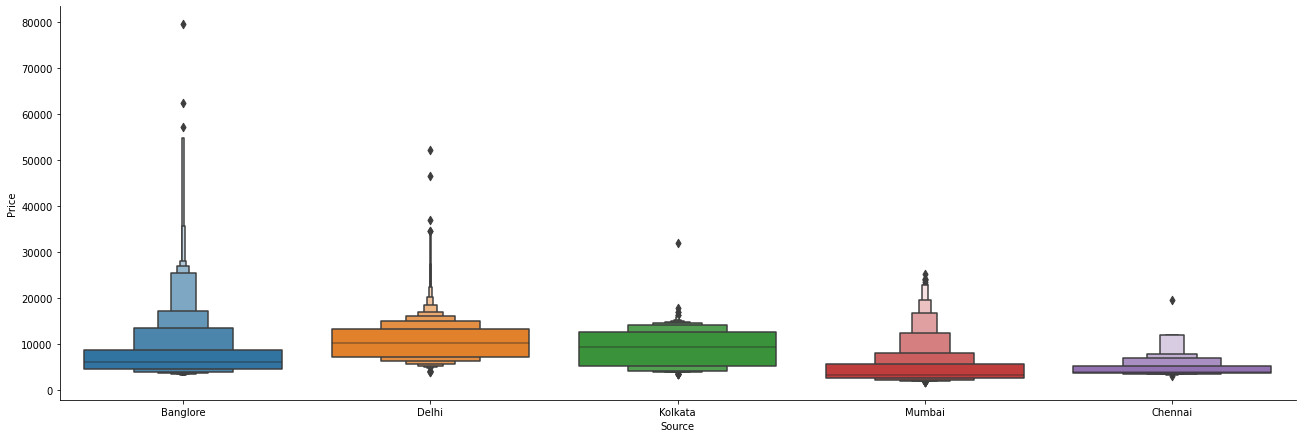

In [18]:
sns.catplot(x = "Source",y = "Price",data = df.sort_values("Price",ascending = False),kind = "boxen",  height = 6, aspect = 3)
plt.show()
# Banglore is most repeated value that is why we will left that column for sake of good calculation

In [19]:
Source = df[["Source"]]
Source = pd.get_dummies(Source,drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [20]:
# same process as source we will done on destination and since bothe are similar so it will be same operation
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

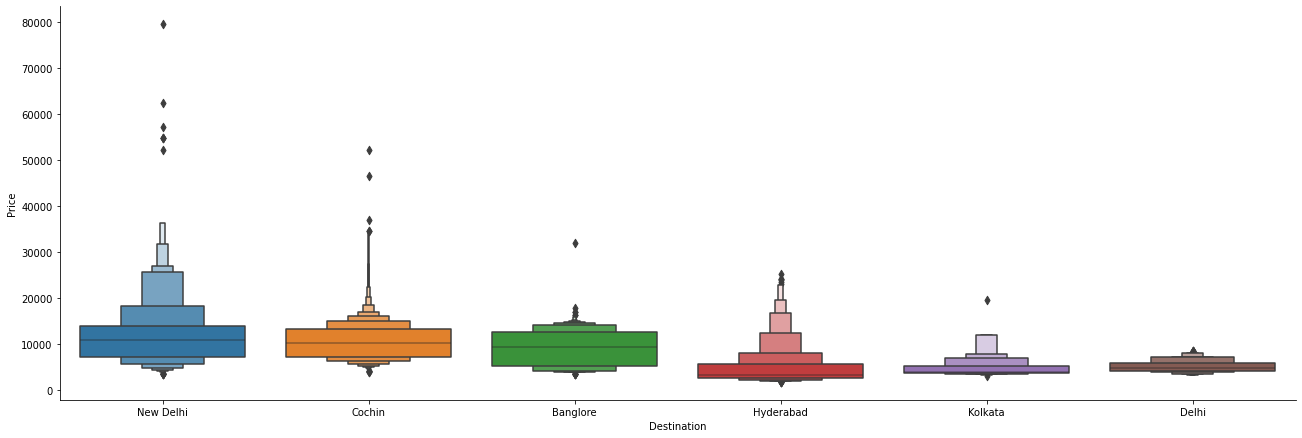

In [21]:
# box plot agist dependent variable
sns.catplot(x = "Destination",y = "Price",data = df.sort_values("Price",ascending = False),kind = "boxen",  height = 6, aspect = 3)
plt.show()


In [22]:
Destination = df[["Destination"]] 
Destination = pd.get_dummies(Destination,drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [23]:
# since route and no of stop are reffering same and route has need more data preparation part we will drop it 
# then addional info has no information for more than 80% of data 
#so kindly drop these two column
df.drop(["Route","Additional_Info"],axis = 1,inplace = True)


In [24]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [25]:
# now we will update  total_stop to numeric values , stop will count as nos.
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
#here we just replaced the values of total stops string to int using dictionary and replace function
new_stop = {"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4}
df.replace(new_stop,inplace = True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,3,1,16,50,21,35,4,45


In [27]:
# now we will connect all data frame contain one hatencoding and delete orignal in the end 
new_df = pd.concat([df,Airline,Source,Destination],axis = 1)
new_df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,...,0,0,0,0,0,0,0,0,0,1
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,6,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,3,...,0,0,0,0,0,0,0,0,0,1


In [28]:
# now delete orignal columns of onehatencoding data farmes from the final data frame part data frame
new_df.drop(["Date_of_Journey","Dep_Time","Arrival_Time","Duration","Source","Airline","Destination"],axis = 1,inplace = True)


In [29]:
# we discover that airline true jet has only single row data which is not importtant so we can drop that column ,will help 
#in predicting more and avoid overfitting
new_df.drop(["Airline_Trujet"],axis = 1,inplace = True)

In [30]:
new_df.head()

,Total_Stops,Price,Journey_Day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [31]:
new_df.shape # now this is our extracted data and we will apply our regression  model on this datafile.

(10682, 29)

### we will do same steps like we have done in dataset file 
1. extract feature 
 <br> a. date of journey
 <br> b. dep_time
  <br>c. arrival time
 <br> d. duration
2. change the data of total stop  string to int
3. do one hat encoding on nominal-catagorical data
 <br> a. airline
  <br>b. source
  <br>c. destination 
4. delete all orignal columns  which are extracted once

In [32]:
# but we have another file for validation called test.xmls we need to do same things on that file to  other wise our output will also diffrent 
df2 = pd.read_excel("Test_set.xlsx")
df2 # this is for test not for modeling 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [33]:
# we will all operation at ones test data also 
df2["Date_of_Journey"] = pd.to_datetime(df2["Date_of_Journey"])
df2["Journey_Day"] = pd.to_datetime(df2.Date_of_Journey,format = "%d%m%Y").dt.day # here dt.day will extract the year from the given data
df2["Journey_month"] = df2["Date_of_Journey"].dt.month # we don't need to convert as we converted real data into date and time
df2["departure_hour"] = pd.to_datetime(df2["Dep_Time"]).dt.hour # we made new column contain only departure time in hour
df2["departure_minute"] = pd.to_datetime(df2["Dep_Time"]).dt.minute # we made new column contain only departure time in minute
df2["Arrival_hour"] = pd.to_datetime(df2["Arrival_Time"]).dt.hour
df2["Arrival_minute"] = pd.to_datetime(df2["Arrival_Time"]).dt.minute
#hour and minute extraction
duration = list(df2["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
hours = []
minute = []
for i in range(len(duration)):
    hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    minute.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration 
df2["Duration_hour"] = hours
df2["Duration_minute"] = minute
df2["Airline"].value_counts()

Airline  = df2[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)

Source = df2[["Source"]]
Source = pd.get_dummies(Source,drop_first = True)

Destination = df2[["Destination"]] 
Destination = pd.get_dummies(Destination,drop_first = True)

df2.drop(["Route","Additional_Info"],axis = 1,inplace = True)

new_stop = {"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4}
df2.replace(new_stop,inplace = True)

new_df2 = pd.concat([df2,Airline,Source,Destination],axis = 1)

new_df2.drop(["Date_of_Journey","Dep_Time","Arrival_Time","Duration","Source","Airline","Destination"],axis = 1,inplace = True)

new_df2.shape

(2671, 28)

In [34]:
new_df.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_month',
       'departure_hour', 'departure_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hour', 'Duration_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

# Feature selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

<br>1. heatmap
<br>2. feature_importance_
<br>3. SelectKBest

In [35]:
new_df.shape

(10682, 29)

In [36]:
new_df.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_month',
       'departure_hour', 'departure_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hour', 'Duration_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [37]:
# now we will split our dependent and independet variables
x = new_df.loc[:,['Total_Stops', 'Journey_Day', 'Journey_month',
       'departure_hour', 'departure_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hour', 'Duration_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']] # this is first rows and then column formate insecond part we discarded price as it is our dep var 
x.head()#indep var

,Total_Stops,Journey_Day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
y = new_df.iloc[:,1] # if we use iloc it will return in series but loc will return in datafame
y.head() #  dep var

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [39]:
# Finds correlation between Independent and dependent attributes
df.corr() # we will cheack on orignal dataframe df  which is not encoded and contain full data 
# this will only print matrix if we want heat map then we can use sns lib as well

,Total_Stops,Price,Journey_Day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
Total_Stops,1.000000,0.603897,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Price,0.603897,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Journey_Day,-0.024136,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708
Journey_month,0.065495,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597
departure_hour,-0.061476,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
departure_minute,-0.002618,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,0.038140,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_minute,-0.106940,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hour,0.739916,0.508778,-0.037964,0.055552,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_minute,-0.136706,-0.124855,-0.007708,-0.018597,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


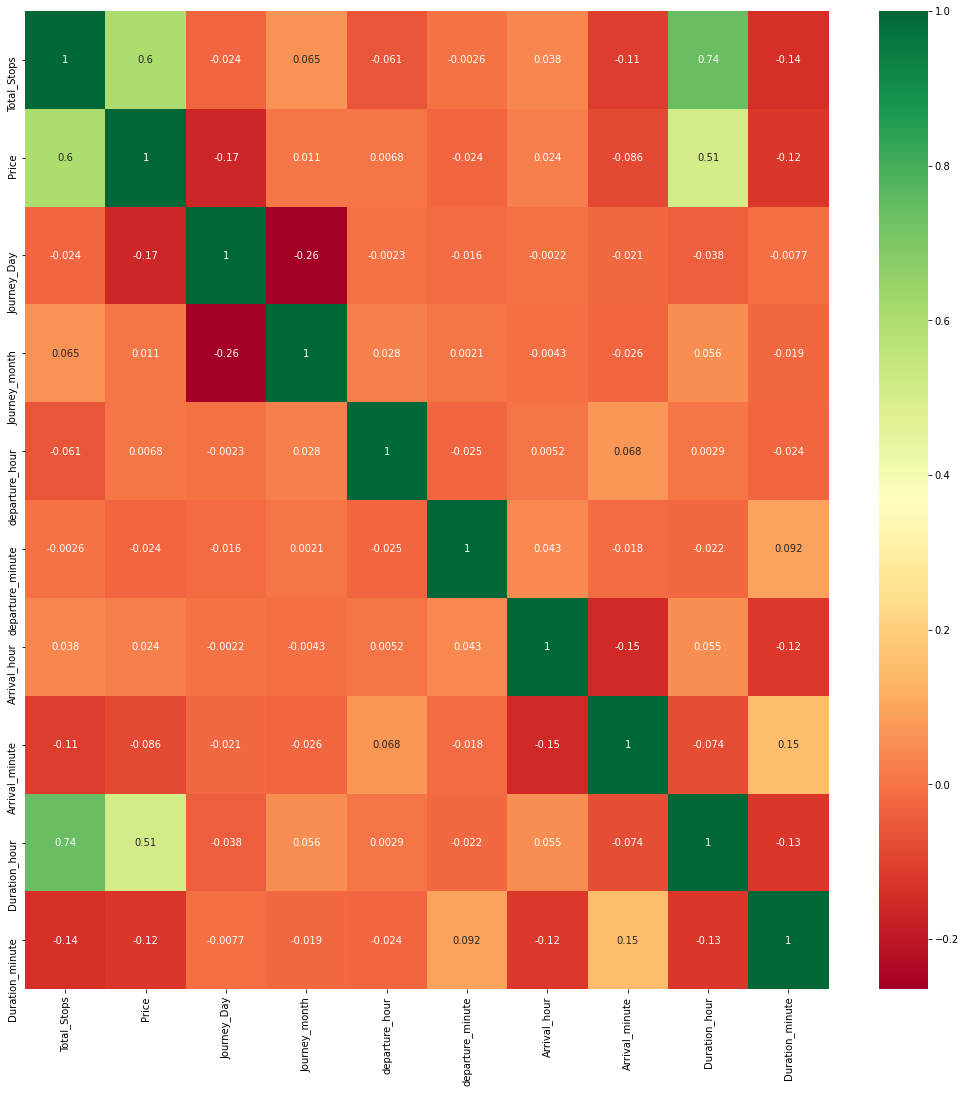

In [40]:

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True,cmap = "RdYlGn" ) # RdYlGn = red,yellow,green

plt.show()

< ipython-input-61-8e63351aa1ce >:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(x, y)
    
#### this is an error which means your y is 1d yet showing means it is not series bt dataframe so convert into series    

In [41]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [42]:
# using regressor find important featires
selection.feature_importances_

array([2.32750082e-01, 1.09101996e-01, 8.49723362e-02, 2.46637928e-02,
       2.17227157e-02, 2.90308146e-02, 2.08661469e-02, 1.04067939e-01,
       1.86363117e-02, 9.91301220e-03, 2.09723624e-03, 1.88775081e-02,
       1.49426115e-01, 6.69281423e-02, 1.92212169e-02, 9.31077420e-04,
       3.80020674e-03, 5.18246786e-03, 1.31743841e-04, 5.48768275e-04,
       1.23828432e-02, 4.35632273e-03, 6.84330937e-03, 8.43706079e-03,
       1.51986837e-02, 6.09440825e-03, 4.56616304e-04, 2.33611254e-02])

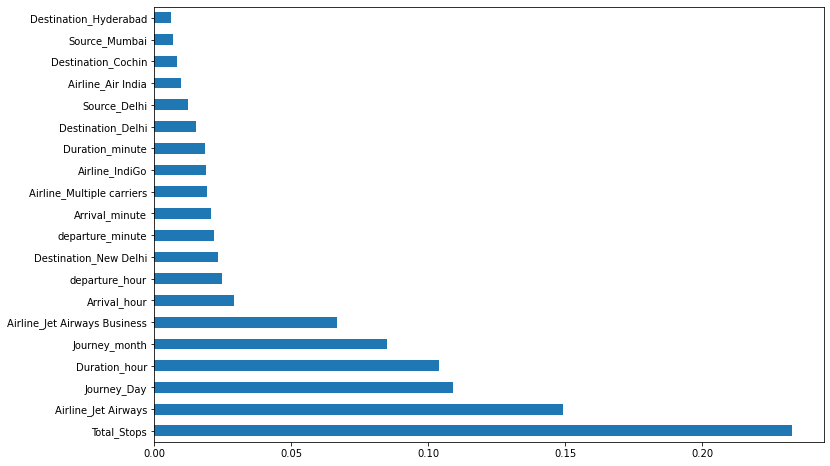

In [43]:
# we will print graph of feature importance 
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Fitting model using Random Forest
1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [44]:
#1 split into train and test of x and y 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [45]:
#3 and 4 
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [46]:
y_pred = reg_rf.predict(x_test)

In [47]:
reg_rf.score(x_train,y_train) # score for training data

0.9527698498333067

In [48]:
reg_rf.score(x_test,y_test) # score for tesing data
# as we can clear see that our model is over fietted because it works better in train but not good in test

0.7919287721495138

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


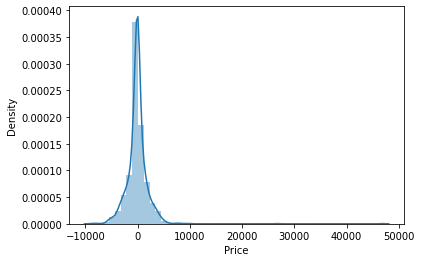

In [49]:
sns.distplot(y_test-y_pred)
plt.show()


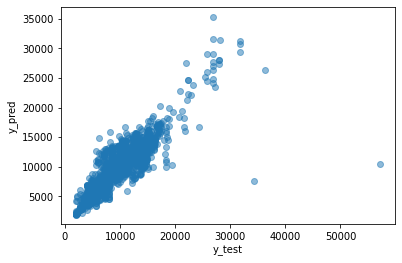

In [50]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [51]:
from sklearn import metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1194.903764211403
MSE: 4486443.534349684
RMSE: 2118.122643840456


In [53]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [54]:
metrics.r2_score(y_test, y_pred)

0.7919287721495138

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [57]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [58]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [59]:
 rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [60]:
# all perameter are tested just called best one and make model on that 
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [62]:
prediction = rf_random.predict(x_test)

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


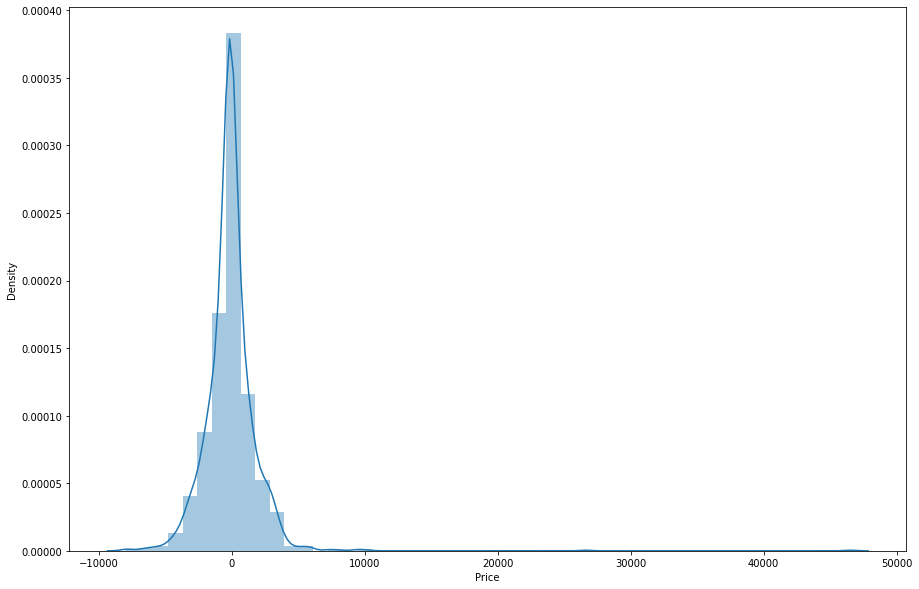

In [65]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)
plt.show()


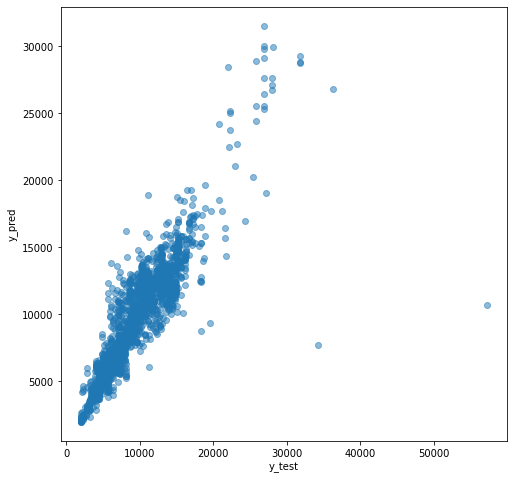

In [69]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1168.0591564366505
MSE: 4137070.870982598
RMSE: 2033.9790733885632


## Save the model to reuse it again

In [73]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [76]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)
metrics.r2_score(y_test, y_prediction)

In [81]:
# calculation of error of best model this data set 
reg2_rf = RandomForestRegressor(
    
 n_estimators= 700,
 min_samples_split = 15,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 20)

reg2_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [85]:
y_pred = reg2_rf.predict(x_test)

In [86]:
reg2_rf.score(x_train,y_train) # score for training data

0.8999427293949311

In [87]:
reg2_rf.score(x_test,y_test) # score for tesing data
# as we can clear see that our model is over fietted because it works better in train but not good in test

0.8078141798253409

## coclusion 
our best model is given 89% on training and 80% on test data set.